In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time as t

### Input Variables

In [2]:
g = 9.8
L = 1.0

### f(y,t) = [ y2, -k*y2 - sin(y1)*g/L ]

In [3]:
def f(y,t):
    return pd.Series([y[1], -k*y[1]-np.sin(math.radians(y[0]))*g/L])

### 4th Order Runge Kutta Method

In [9]:
def Runge_Kutta4(h, N):
    y = pd.Series(data =[theta0, 0.0])
    t = 0.0
    T = [t]
    Y1 = [y[0]]
    Y2 = [y[1]]
    
    for j in range(N):
        k1 = f(y,t)
        k2 = f(y + 0.5*h*k1, t + 0.5*h)
        k3 = f(y + 0.5*h*k2, t + 0.5*h)
        k4 = f(y + h*k3, t+h)
        
        y = y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        t = t+h

        T.append(t)
        Y1.append(y[0])
        Y2.append(y[1])
  
    return T,Y1,Y2

In [92]:
def Runge_Kutta4_(h, N, start, threshold):
    y = pd.Series(data =[theta0, 0.0])
    t = 0.0
    
    for j in range(N):
        k1 = f(y,t)
        k2 = f(y + 0.5*h*k1, t + 0.5*h)
        k3 = f(y + 0.5*h*k2, t + 0.5*h)
        k4 = f(y + h*k3, t+h)
        
        y = y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        t = t+h
        
        if (t > start) and (np.abs(y[0]) <= threshold):
            break
  
    return t, y

### Euler Method

In [10]:
def Euler(h, N):
    y = pd.Series(data =[theta0, 0.0])
    t = 0.0
    T=[t]
    Y1=[y[0]]
    Y2=[y[1]]
    
    for j in range(N):
        k1 = f(y,t)
        y = y + h*k1
        t = t+h
        
        T.append(t)
        Y1.append(y[0])
        Y2.append(y[1])
        
    return T,Y1,Y2

In [91]:
def Euler_(h, N, start, threshold):
    y = pd.Series(data =[theta0, 0.0])
    t = 0.0

    for j in range(N):
        k1 = f(y,t)
        y = y + h*k1
        t = t+h

        if (t > start) and (np.abs(y[0]) <= threshold):
            break
            
    return t, y

In [ ]:
def DrawGraph(step_size, num_step):
    r_time, r_angle, r_velocity = Runge_Kutta4(h=step_size, N=num_step)
    e_time, e_angle, e_velocity = Euler(h=step_size, N=num_step)
    
    #theta(t)
    plt.figure(figsize=(15, 6))
    plt.text(0, theta0, 'Initial angle='+str(theta0)+'\nk='+str(k)+'\nh='+str(step_size)+'\nN='+str(num_step), fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='square', facecolor='wheat', alpha=0.5))
    plt.plot(e_time, e_angle, color='g', label='Euler')
    plt.plot(r_time, r_angle, color='b', label='Runge-Kutta 4')
    plt.xlabel('Time')
    plt.ylabel('Angular Displacement')
    plt.legend()
    plt.grid()
    plt.show()

    #theta'(t)
    plt.figure(figsize=(15, 6))
    plt.text(0,0, 'Initial angle='+str(theta0)+'\nk='+str(k)+'\nh='+str(step_size)+'\nN='+str(num_step), fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='square', facecolor='wheat', alpha=0.5))
    plt.plot(e_time, e_velocity, color='g', label='Euler')
    plt.plot(r_time, r_velocity, color='b', label='Runge-Kutta 4')
    plt.xlabel('Time')
    plt.ylabel('Angular Velocity')
    plt.legend()
    plt.grid()
    plt.show()

#### Euler vs RK4 : no air drag

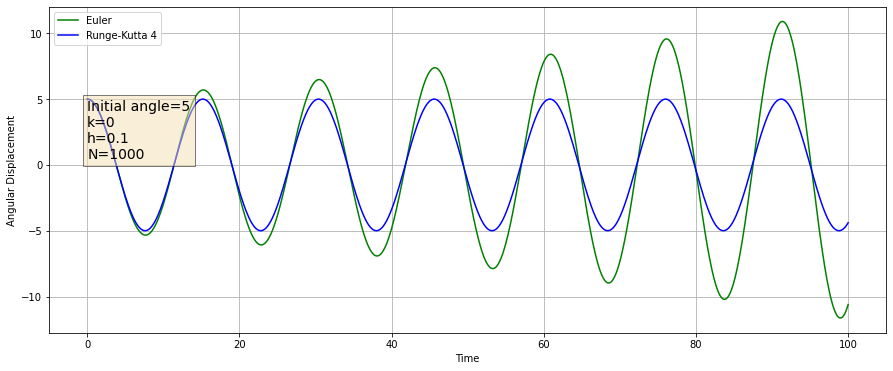

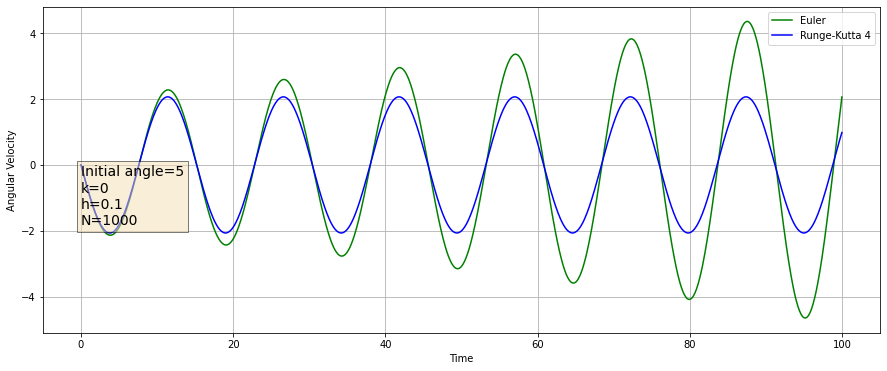

In [99]:
theta0 = 5
k = 0

DrawGraph(step_size = 1.0e-1, num_step = int(1.0e3))

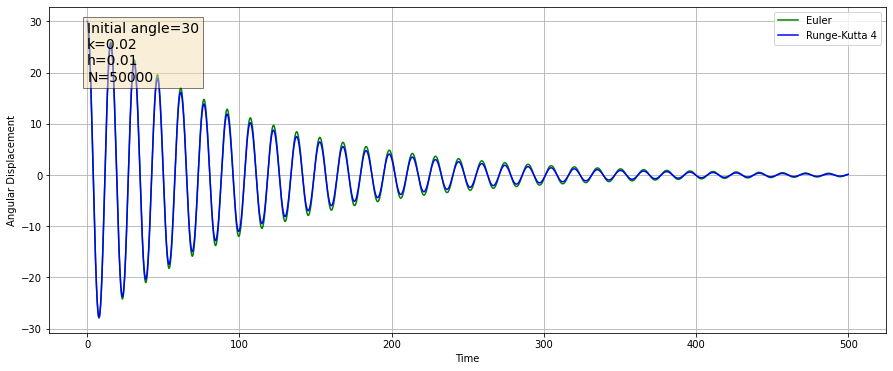

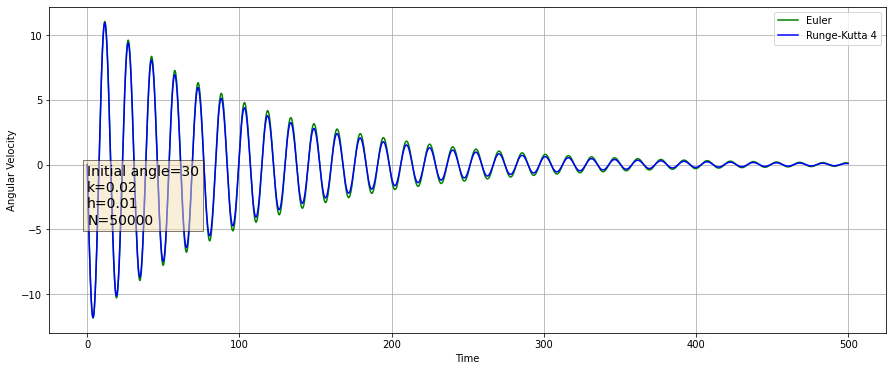

In [36]:
k = 0.02
theta0 = 30
DrawGraph(step_size = 1.0e-2, num_step = 5*int(1.0e4))

### Euler vs RK4 : Various Step Size and Step Number

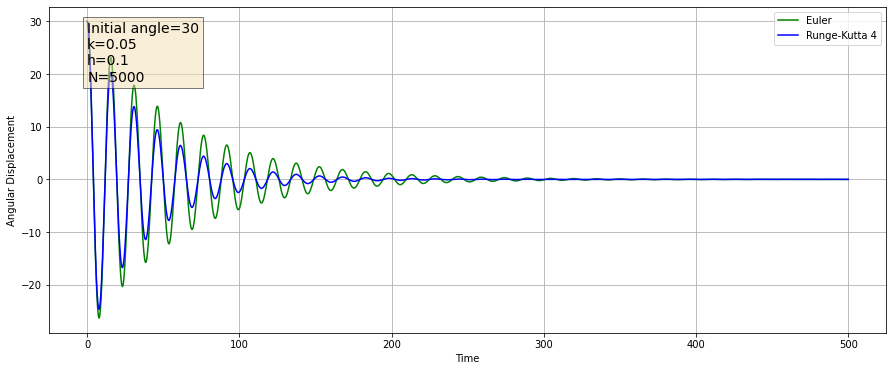

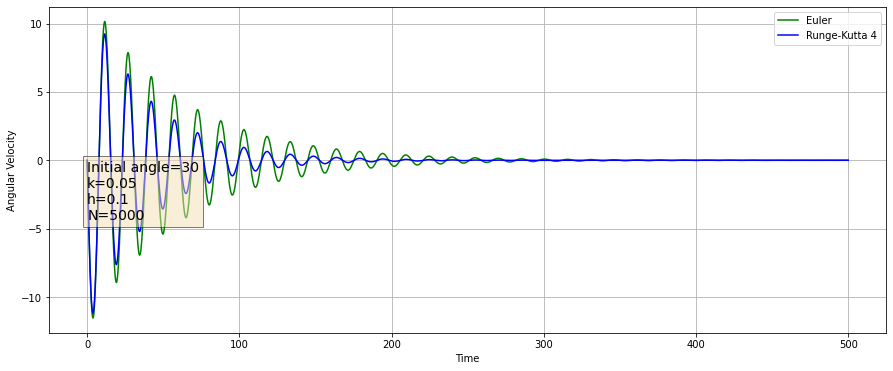

In [45]:
k = 0.05
theta0 = 30
DrawGraph(step_size = 1.0e-1, num_step = 5*int(1.0e3))

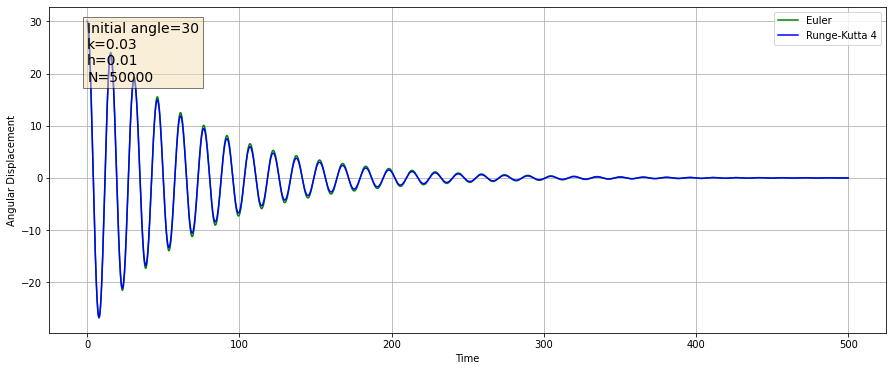

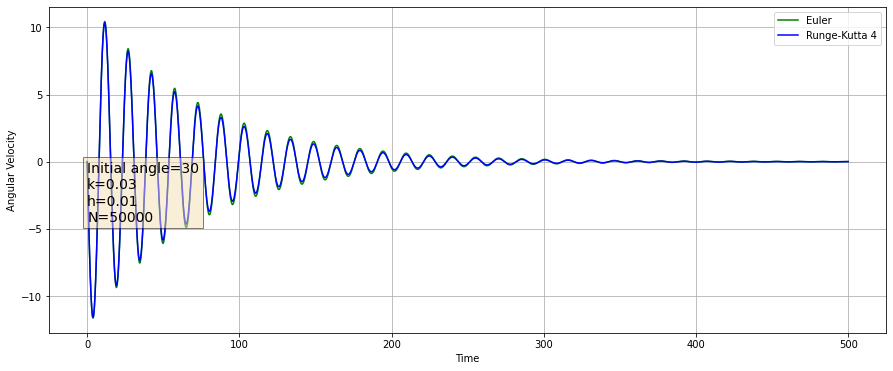

In [46]:
k = 0.03
theta0 = 30
DrawGraph(step_size = 1.0e-2, num_step = 5*int(1.0e4))

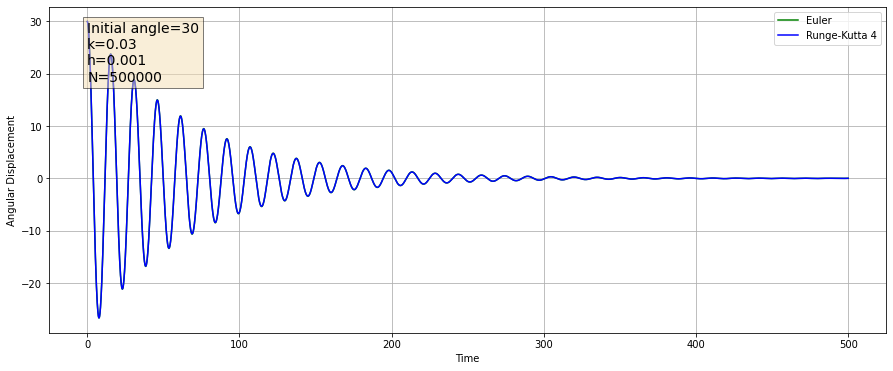

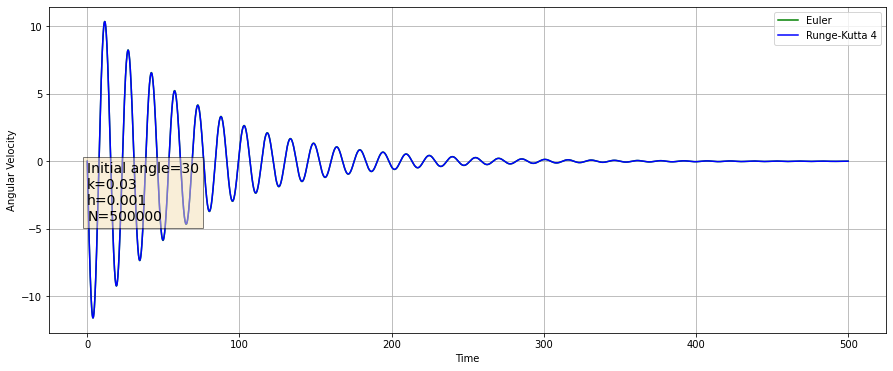

In [47]:
k = 0.03
theta0 = 30
DrawGraph(step_size = 1.0e-3, num_step = 5*int(1.0e5))

### Euler vs RK4 : Small Time Step 

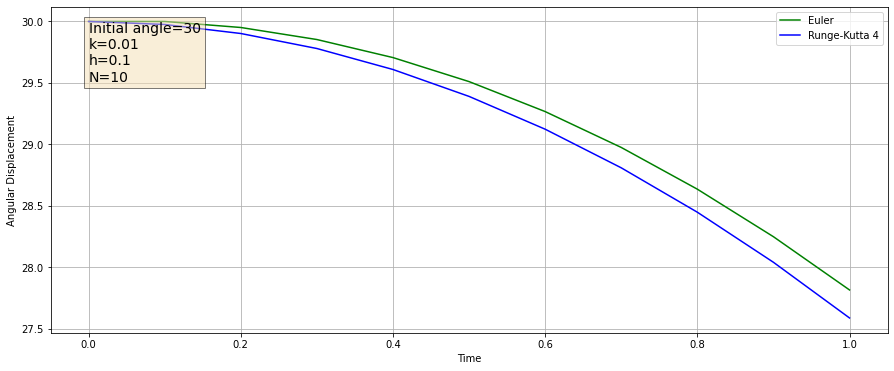

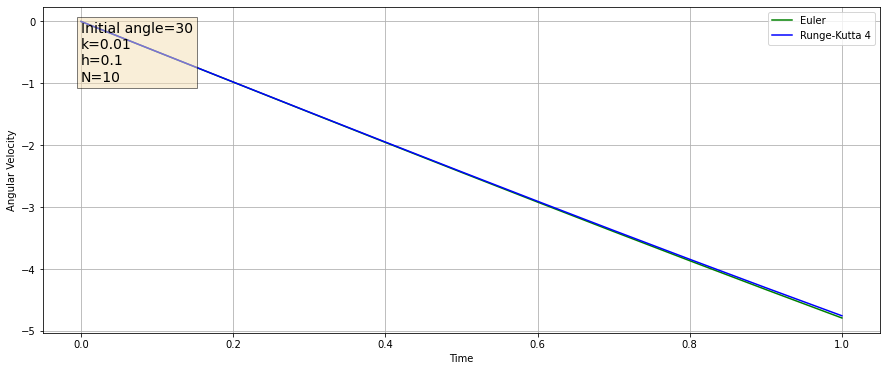

In [49]:
k = 0.01
theta0 = 30
DrawGraph(step_size = 1.0e-1, num_step = 10)

### In various k (fixed angle : 30)

#### k = 0.01

In [85]:
theta0 = 30

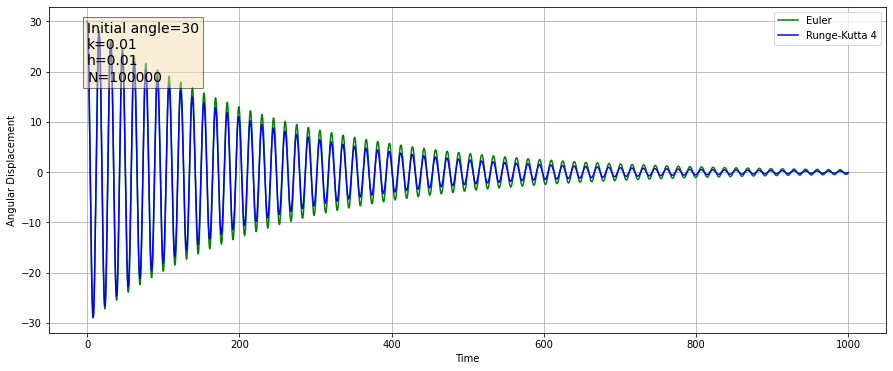

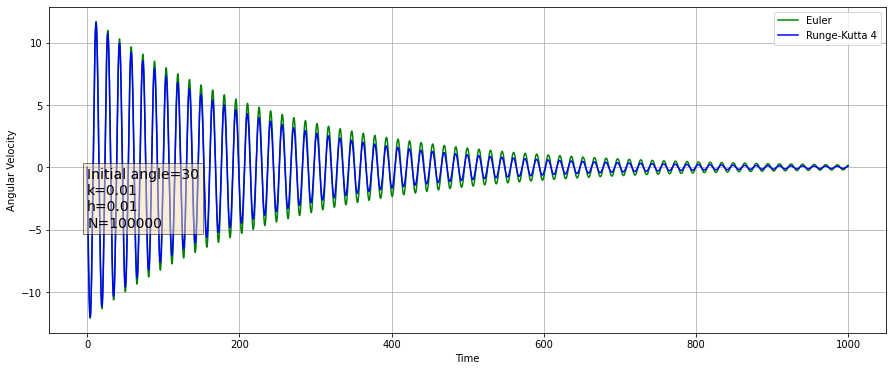

In [86]:
k = 0.01
DrawGraph(step_size = 1.0e-2, num_step = int(1.0e5))

#### k = 0.05

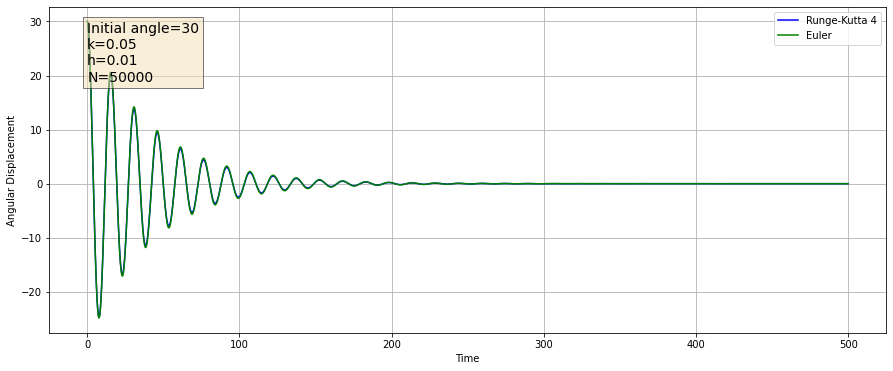

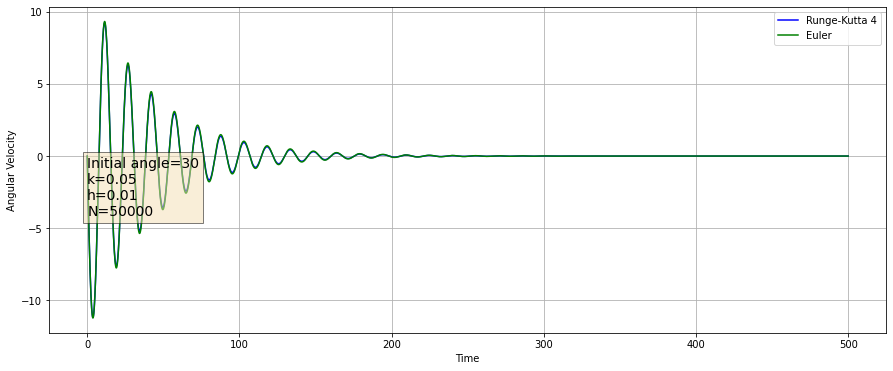

In [26]:
k = 0.05
DrawGraph(step_size = 1.0e-2, num_step = 5*int(1.0e4))

### k = 0.1

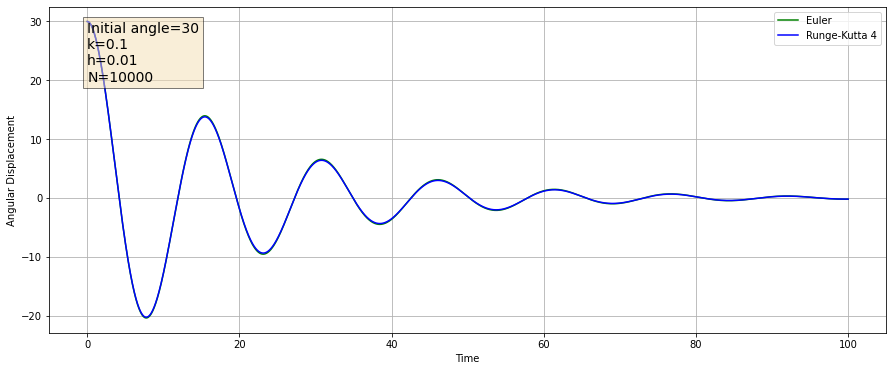

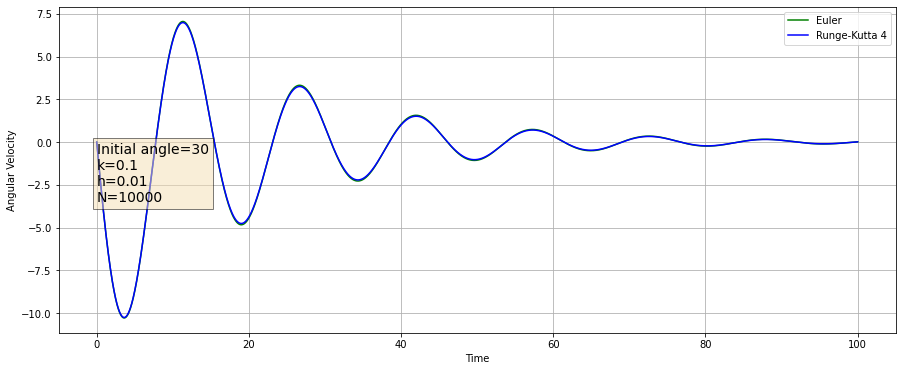

In [54]:
k = 0.1
DrawGraph(step_size = 1.0e-2, num_step = int(1.0e4))

In [83]:
threshold_ = 1.0e-5
start = t.time()
res_1_e_t, res_1_e = Euler_(h = 1.0e-2, N = int(1.0e5), start = 800, threshold=threshold_)
time_1_e = t.time()-start
res_1_r_t, res_1_r = Runge_Kutta4_(h = 1.0e-2, N = 2*int(1.0e5), start = 800, threshold=threshold_)
time_1_r = t.time()-time_1_e

res_5_e_t, res_5_e = Euler_(h = 1.0e-2, N = 5*int(1.0e4), start = 100,threshold=threshold_)
time_5_e = t.time()-time_1_r
res_5_r_t, res_5_r = Runge_Kutta4_(h = 1.0e-2, N = 5*int(1.0e4), start = 100,threshold=threshold_)
time_5_r = t.time()-time_5_e

res_10_e_t, res_10_e = Euler_(h = 1.0e-2, N = int(1.0e4),start = 80, threshold=threshold_)
time_10_e = t.time()-time_5_r
res_10_r_t, res_10_r = Runge_Kutta4_(h = 1.0e-2, N = int(1.0e4), start = 80,threshold=threshold_)
time_10_r = t.time()-time_10_e

In [96]:
Compare = pd.DataFrame(columns=['Euler', 'RK4', 'Euler execution time', 'RK4 execution time'])
print(threshold_)
Compare.loc['0.01'] = [res_1_e_t, res_1_r_t, time_1_e, time_1_r]
Compare.loc['0.05'] = [res_5_e_t, res_5_r_t, time_5_e, time_5_r]
Compare.loc['0.1'] = [res_10_e_t, res_10_r_t, time_10_e, time_10_r]

print(Compare)

1e-05
       Euler     RK4  Euler execution time  RK4 execution time
0.01  820.72  805.03             29.751607        1.638523e+09
0.05  500.00  500.00             49.238449        1.638524e+09
0.1   100.00  100.00             53.065261        1.638524e+09


#### In various Initial Angle

In [87]:
k=0.02
theta0 = 30
t30, y30_angle, y30_velocity = Runge_Kutta4(h = 1.0e-2, N = 5*int(1.0e4))
theta0 = 60
t60, y60_angle, y60_velocity = Runge_Kutta4(h = 1.0e-2, N = 5*int(1.0e4))
theta0 = 120
t120, y120_angle, y120_velocity = Runge_Kutta4(h = 1.0e-2, N = 5*int(1.0e4))

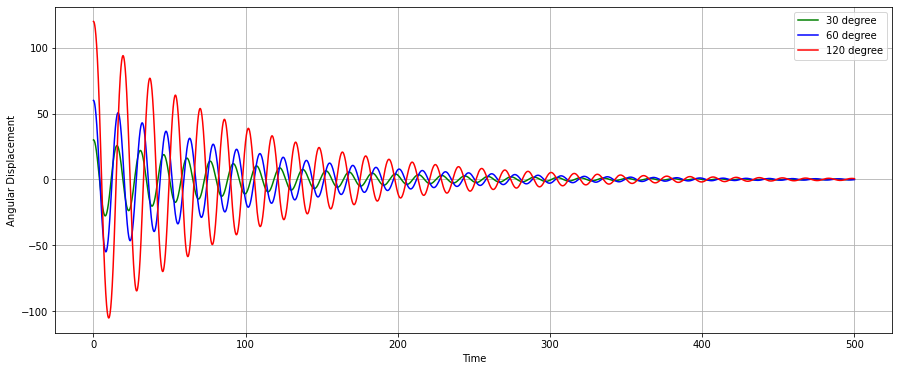

In [88]:
plt.figure(figsize=(15, 6))
plt.plot(t30, y30_angle, color='g', label='30 degree')
plt.plot(t60, y60_angle, color='b', label='60 degree')
plt.plot(t120, y120_angle, color='r', label='120 degree')
plt.xlabel('Time')
plt.ylabel('Angular Displacement')
plt.legend()
plt.grid()
plt.show()

In [93]:
threshold_ = 1.0e-5
theta0 = 30
res_30_e_t, res_30_e = Euler_(h = 1.0e-2, N = int(1.0e5), start = 300, threshold=threshold_)
res_30_r_t, res_30_r = Runge_Kutta4_(h = 1.0e-2, N = int(1.0e5), start = 300, threshold=threshold_)
theta0 = 60
res_60_e_t, res_60_e = Euler_(h = 1.0e-2, N = int(1.0e5), start = 300,threshold=threshold_)
res_60_r_t, res_60_r = Runge_Kutta4_(h = 1.0e-2, N = int(1.0e5), start = 300,threshold=threshold_)
theta0 = 120
res_120_e_t, res_120_e = Euler_(h = 1.0e-2, N = int(1.0e5),start = 300, threshold=threshold_)
res_120_r_t, res_120_r = Runge_Kutta4_(h = 1.0e-2, N = int(1.0e5), start = 300,threshold=threshold_)

In [94]:
Compare_angle = pd.DataFrame(columns=['Euler', 'RK4'])

print(threshold_)
Compare_angle.loc['30'] = [res_30_e_t, res_30_r_t]
Compare_angle.loc['60'] = [res_60_e_t, res_60_r_t]
Compare_angle.loc['120'] = [res_120_e_t, res_120_r_t]

print(Compare_angle)

1e-05
      Euler     RK4
30   605.01  650.58
60   744.46  653.06
120  647.31  669.32
